# Lab 2: Data Preparation

In this excercise I will 
* encode all categorical attributes as numerical,
* treat missing values
* apply scaler where necessary
* treat outliers appropriately
* create at 2 new feature from the existing ones.

and save the prepared dataset as a CSV file.

## A. Import Python Modules and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("./bank.csv")
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


We make a copy of the data prior to processing. 

In [2]:
df_original = df

We check the data for missing values.

In [3]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

There are 454 missing values for `poutcome`, the previous outcome of the last campaign. There are 191 missing values for `contact`, 104 missing values for `education`. `age` and `job` have the least number of missing values, 12 and 10 respectively.

## B. Process and Encode the Categorical Features

We have catagorical features: 
* `job`
* `martial`
* `education`
* `contact`
* `month`
* `poutcome`

<br>

including binary variables:
* `default`
* `housing`
* `loan`
* `subscribed`


### Encode Ordinal Categorical Attributes 

The column `education` is ordinal, where we have 'primary', 'secondary', and 'tertiary' education levels, which can be replaced by 1, 2, 3. 

In [4]:
scale_mapper = {
    "primary": 1,
    "secondary": 2,
    "tertiary": 3
}

df['education'] = df['education'].replace(scale_mapper)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,3.0,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,2.0,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,2.0,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,2.0,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,2.0,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [5]:
scale_mapper_month = {
    "jan": 1,
    "feb": 2,
    "mar": 3,
    "apr": 4,
    "may": 5,
    "jun": 6,
    "jul": 7,
    "aug": 8,
    "sep": 9,
    "oct": 10,
    "nov": 11,
    "dec": 12
}

df['month'] = df['month'].replace(scale_mapper_month)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,3.0,no,392,yes,no,cellular,1,4,957,2,131,2,failure,no
1,39.0,technician,divorced,2.0,no,688,yes,yes,cellular,1,4,233,2,133,1,failure,no
2,59.0,retired,married,2.0,no,1035,yes,yes,cellular,1,4,126,2,239,1,failure,no
3,47.0,blue-collar,married,2.0,no,398,yes,yes,cellular,1,4,274,1,238,2,failure,no
4,54.0,retired,married,2.0,no,1004,yes,no,cellular,1,4,479,1,307,1,failure,no


### One-Hot Encode All Other Categorical Attributes

We first one-hot encode the categorical variables with missing values NaNs: `poutcome`, `contact`, `job`.

In [6]:
df = pd.get_dummies(df, columns=['poutcome', 'contact', 'job'], 
                        dummy_na=True, 
                        drop_first=True)
df.tail()

,age,marital,education,default,balance,housing,loan,day,month,duration,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_nan
1995,20.0,single,NaN,no,2785,no,no,16,9,327,...,0,0,0,0,0,0,1,0,0,0
1996,28.0,single,2.0,no,127,no,no,16,9,1334,...,0,0,0,0,0,0,0,0,0,0
1997,81.0,married,1.0,no,1154,no,no,17,9,231,...,0,0,0,1,0,0,0,0,0,0
1998,46.0,married,1.0,no,4343,yes,no,20,9,185,...,0,0,0,0,0,1,0,0,0,0
1999,40.0,married,2.0,no,6403,no,no,22,9,208,...,1,0,0,0,0,0,0,0,0,0


Now we can proceed to encode the other categorical columns. 

In [7]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,education,balance,day,month,duration,campaign,pdays,previous,poutcome_other,...,job_student,job_technician,job_unemployed,job_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
0,32.0,3.0,392,1,4,957,2,131,2,0,...,0,1,0,0,0,1,0,1,0,0
1,39.0,2.0,688,1,4,233,2,133,1,0,...,0,1,0,0,0,0,0,1,1,0
2,59.0,2.0,1035,1,4,126,2,239,1,0,...,0,0,0,0,1,0,0,1,1,0
3,47.0,2.0,398,1,4,274,1,238,2,0,...,0,0,0,0,1,0,0,1,1,0
4,54.0,2.0,1004,1,4,479,1,307,1,0,...,0,0,0,0,1,0,0,1,0,0


The results of the encoding can be seen in the list of columns below, where each categorical variable is now represented by p-1 variables, where p is the number of levels.

In [8]:
list(df.columns.values)

['age',
 'education',
 'balance',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome_other',
 'poutcome_success',
 'poutcome_nan',
 'contact_telephone',
 'contact_nan',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_nan',
 'marital_married',
 'marital_single',
 'default_yes',
 'housing_yes',
 'loan_yes',
 'subscribed_yes']

## C. Treatment of Missing Values in Numerical Columns

### Check for Missing Values

We impute missing values to support the development of an accurate model.

The number of missing values is reported below. 

In [9]:
df.isna().sum()

age                   12
education            104
balance                0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
poutcome_other         0
poutcome_success       0
poutcome_nan           0
contact_telephone      0
contact_nan            0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_nan                0
marital_married        0
marital_single         0
default_yes            0
housing_yes            0
loan_yes               0
subscribed_yes         0
dtype: int64

There are 12 missing values in the `age` column, which is less than 25% of the data. Thus not justifying the removal of the column. 

### Impute Missing Values

We impute the missing values for the `age` column using information from the `marital` status and `job` status. One could expect `job_retired` and `marital_single` to give a suitable esitmate of the `age` values, since age will differ greatly in these groups. 

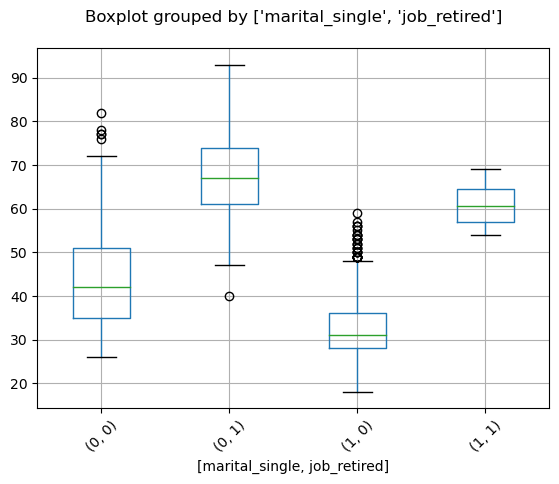

In [10]:
df.boxplot(column='age', by=['marital_single','job_retired'], rot=45)
plt.title("")
plt.show()

We see differences in the median `age` across groups, this median can be used to impute the missing values for `age`. We create a pivot table, and function to impute the `age` based on the values of `job_retired` and `marital_single`.

In [11]:
ptable = df.pivot_table(values='age', 
                        index='marital_single',
                        columns='job_retired',  
                        aggfunc=np.median)
ptable

job_retired,0,1
marital_single,,
0,42.0,67.0
1,31.0,60.5


In [12]:
def get_element(x):
    return ptable.loc[x['marital_single'], x['job_retired']]

# Replace missing values
df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace=True)

We could use a machine learning algorithm to impute `education` on the basis of other columns.

Lets explore the relationship between `education`, `management` and `single`.  We could hypothesise that management positions and relationship status could inform us of a persons education. 

In [13]:
ptable = df.pivot_table(values='education', 
                        index='job_management',
                        columns='marital_single',
                        aggfunc=np.median)
ptable

marital_single,0,1
job_management,,
0,2.0,2.0
1,3.0,3.0


There is no apparent differences when we inclue `marital` status such as `single` or `married`, rather than proceeding with just `job_management` to predict `education`, and introducing bias and confounding. It is most suitable to use the median value for education to impute the missing values. 

In [14]:
df['education'].fillna(df['education'].median(), inplace=True)

In [15]:
df.isna().sum()

age                  0
education            0
balance              0
day                  0
month                0
duration             0
campaign             0
pdays                0
previous             0
poutcome_other       0
poutcome_success     0
poutcome_nan         0
contact_telephone    0
contact_nan          0
job_blue-collar      0
job_entrepreneur     0
job_housemaid        0
job_management       0
job_retired          0
job_self-employed    0
job_services         0
job_student          0
job_technician       0
job_unemployed       0
job_nan              0
marital_married      0
marital_single       0
default_yes          0
housing_yes          0
loan_yes             0
subscribed_yes       0
dtype: int64

There are now no missing values in this dataset. However, some missing values may not be marked as `NaN`, such as `-1` for `pdays` signifying the client was not previously contacted. We will look at this later, in section F.

## D. Rescaling Features

### D.1 Robust Scaling

We apply `RobustScaler` to `age`, `balance`, `duration` and `prevoius` to generalise the scales in the presence of outliers noted in Lab 1. `RobustScaler` transforms each value in a column by subtracting the median from it and then dividing by the interquartile range. We consider `days`, `month`, `pdays`, `education` and `campaign` later.

In [16]:
robust_scaler = RobustScaler()
df[['age',
    'balance',  
   'duration', 'previous']] = robust_scaler.fit_transform(df[['age',
                                                    'balance',
                                                 'duration', 'previous']])

### D.2 MinMax Scaling

#### `day`

The `day` column has discrete values between 1-31. 
We can change this range to [0, 1] by using the MinMaxScaler. 

In [17]:
df['day'].value_counts()

8     204
29    187
2     156
4     148
5     104
3      95
28     92
6      92
13     68
30     68
17     66
9      60
16     55
12     55
14     54
20     52
15     46
1      45
26     37
22     37
27     33
10     33
23     33
21     32
11     28
25     26
18     24
19     21
7      19
24     18
31     12
Name: day, dtype: int64

In [18]:
df['day'] = (df['day']-1)/30


In [19]:
df['day'].describe()

count    2000.000000
mean        0.428383
std         0.323740
min         0.000000
25%         0.133333
50%         0.366667
75%         0.733333
max         1.000000
Name: day, dtype: float64

#### `month`

Similarly, discrete `month` values lie between 1 and 12. We use the MinMaxScaler method to scale these values. 

In [20]:
df['month'].value_counts()

2     404
5     333
1     245
4     205
7     167
8     136
9     134
6     104
10     93
3      70
11     68
12     41
Name: month, dtype: int64

In [21]:
df['month'] = (df['month']-1)/11

In [22]:
df['month'].describe()

count    2000.000000
mean        0.363864
std         0.279998
min         0.000000
25%         0.090909
50%         0.363636
75%         0.545455
max         1.000000
Name: month, dtype: float64

#### `campaign`

The number of contacts during this campaign are discreet values, with few outliers. we will use the MaxMinScaler here. 

In [23]:
df['campaign'].value_counts()

1     1063
2      506
3      219
4       99
5       50
6       31
7       17
8        6
9        5
11       3
10       1
Name: campaign, dtype: int64

In [24]:
df['campaign'] = (df['campaign']-1)/10

In [25]:
df['campaign'].describe()

count    2000.000000
mean        0.090950
std         0.137886
min         0.000000
25%         0.000000
50%         0.000000
75%         0.100000
max         1.000000
Name: campaign, dtype: float64

#### `education`

We know education has values between 1 and 3. We can use the minmaxscaler to standardise these to between [0,1]

In [26]:
df['education'].value_counts()

2.0    1099
3.0     684
1.0     217
Name: education, dtype: int64

In [27]:
df['education'] = (df['education']-1)/2

In [28]:
df['education'].value_counts()

0.5    1099
1.0     684
0.0     217
Name: education, dtype: int64

In [29]:
df.describe()

,age,education,balance,day,month,duration,campaign,pdays,previous,poutcome_other,...,job_student,job_technician,job_unemployed,job_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.208056,0.616750,0.597826,0.428383,0.363864,0.240431,0.090950,167.896000,0.280750,0.073500,...,0.04800,0.174000,0.034500,0.005000,0.555500,0.337000,0.007500,0.481500,0.125000,0.500000
std,0.705988,0.314713,2.169941,0.323740,0.279998,0.950890,0.137886,131.754126,1.700368,0.261021,...,0.21382,0.379204,0.182555,0.070551,0.497034,0.472803,0.086299,0.499783,0.330802,0.500125
min,-1.111111,0.000000,-1.060984,0.000000,0.000000,-0.982833,0.000000,-1.000000,-1.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.333333,0.500000,-0.242204,0.133333,0.090909,-0.386266,0.000000,75.750000,-0.500000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,0.000000,0.366667,0.363636,0.000000,0.000000,182.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.666667,1.000000,0.757796,0.733333,0.545455,0.613734,0.100000,251.000000,0.500000,0.000000,...,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,3.055556,1.000000,55.892585,1.000000,1.000000,6.811159,1.000000,854.000000,26.500000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## E. Treatment of Outliers

####  `balance`,  `duration`, `previous` and `age`

In Lab 1, we observed outliers in `balance`, `duration`, `previous` and `age`. These extreme values lead to skewed distributions affect the modelling process. We will investigate `pdays` later. 

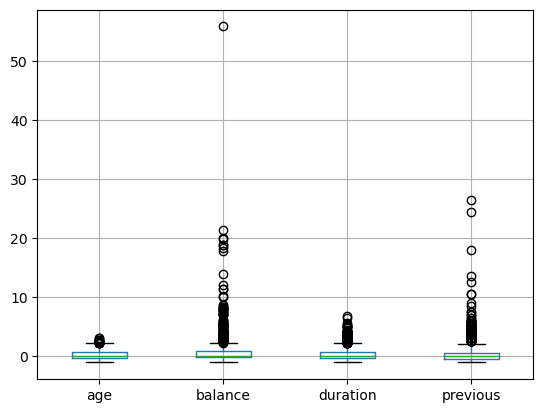

In [30]:
df.boxplot(column=['age',
    'balance',  
    'duration',
    'previous'])
plt.show()

We explore the histograms following scaling, these follow the same distribution as the original variables in Lab1, however the range is more compact. 

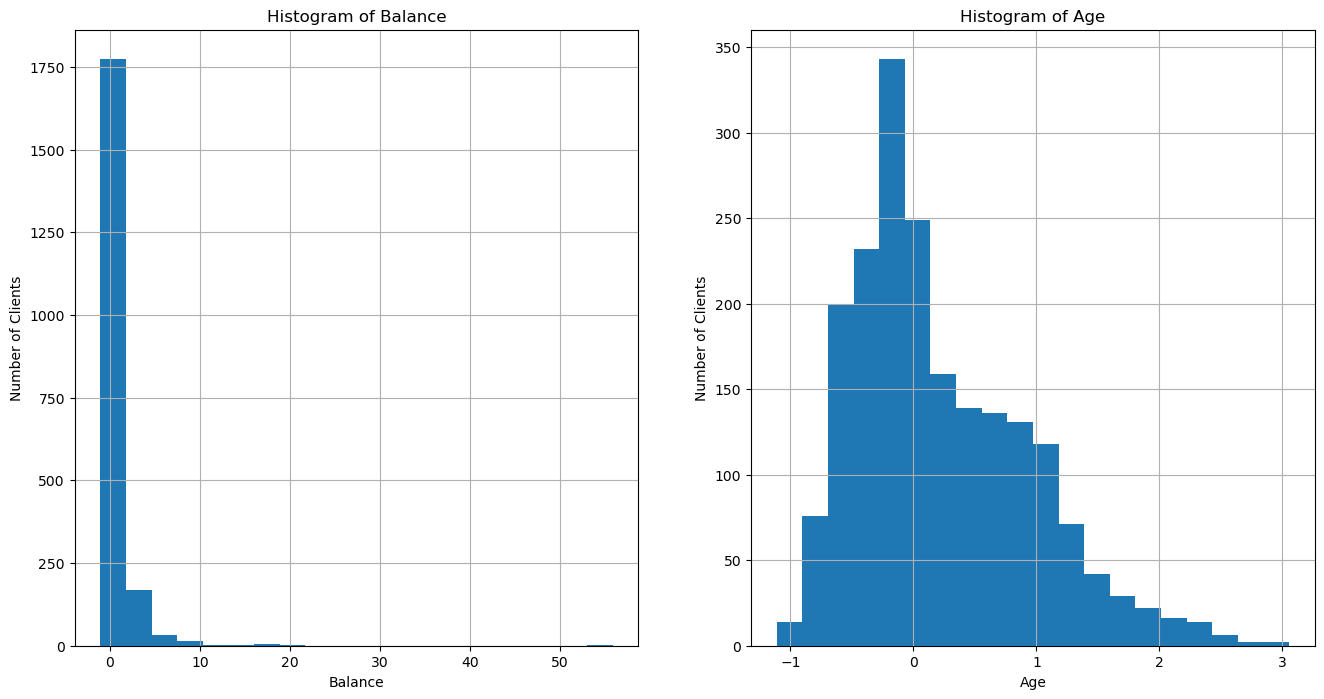

In [31]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,8))

# Plot balance
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of Balance")
ax1.set_xlabel('Balance')
ax1.set_ylabel('Number of Clients')
df['balance'].hist(bins=20)

# Plot age
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of Age")
ax3.set_xlabel('Age')
ax3.set_ylabel('Number of Clients')
df['age'].hist(bins=20)

plt.show()

Both histograms are right skewed due to outliers, this is not ideal for the ML algorithms. 
Balance has many extreme outliers, which is common when we deal with monetary data.

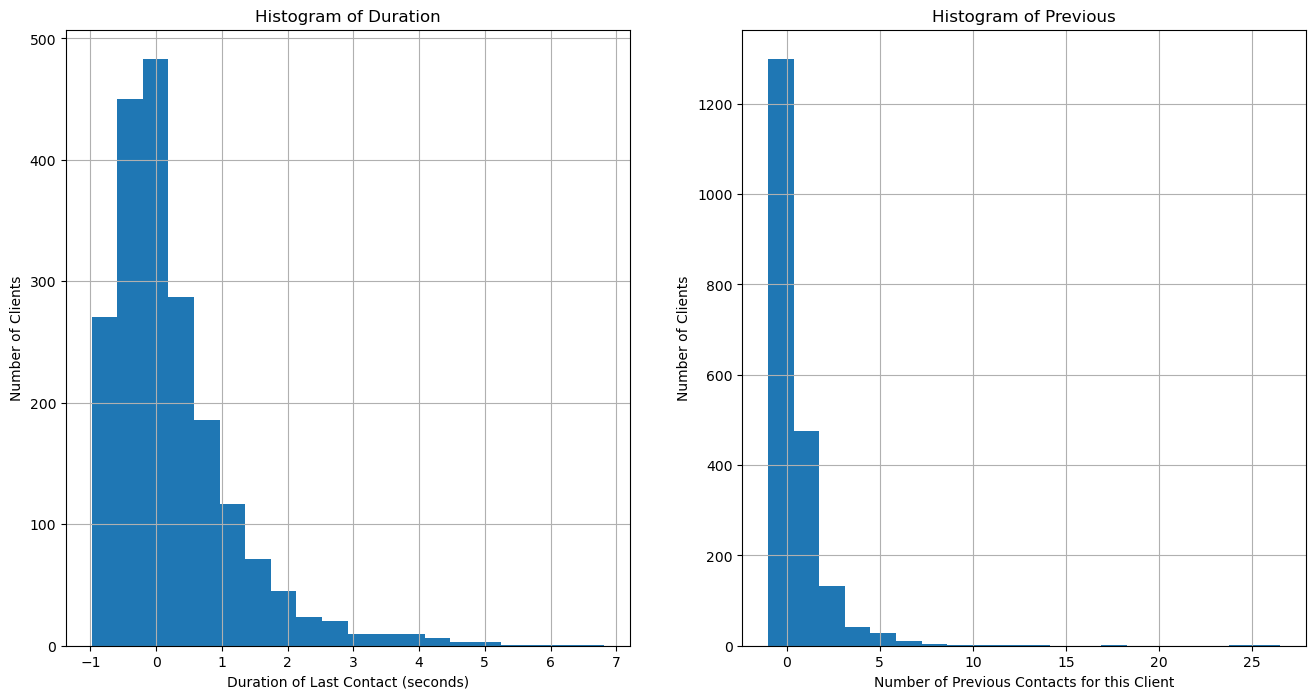

In [32]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,8))

# Plot duration
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of Duration")
ax1.set_xlabel('Duration of Last Contact (seconds)')
ax1.set_ylabel('Number of Clients')
df['duration'].hist(bins=20)

# Plot previous
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of Previous")
ax3.set_xlabel('Number of Previous Contacts for this Client')
ax3.set_ylabel('Number of Clients')
df['previous'].hist(bins=20)

plt.show()

The distribution of previous does not appear to be normally distributed, and is very right skewed. Similary, the distribution of the number of previous contacts is right skewed. 

The scaled numeric variables are clearly right skewed and will need to be investigated before modelling. 

We invesitgate the minimum values in these columns.

In [33]:
df[['age',
    'balance',  
    'duration',
    'previous']].min()

age        -1.111111
balance    -1.060984
duration   -0.982833
previous   -1.000000
dtype: float64

Extreme values are possible for all columns together, for example, a person with a low age may have a low account balance. Similarly, a person who was contacted many times prior to this campaign, may have a long phone call duration for their most recent call.

To reduce the impact of outliers, we will apply a log transformation to the data. To ensure valid log values, we must shift each variable to the interval $[1, +\infty]$ before applying the log transformation.


In [34]:
# Use a log transformation to decrease the impact of outliers
df['age'] = np.log(df['age'] + abs(min(df['age'])) + 1)
df['balance'] = np.log(df['balance'] + abs(min(df['balance'])) + 1)
df['duration'] = np.log(df['duration'] + abs(min(df['duration'])) + 1)
df['previous'] = np.log(df['previous'] + abs(min(df['previous'])) + 1)

We can now re-plot the values of `age`, `balance`, `duration`, and `previous`. 

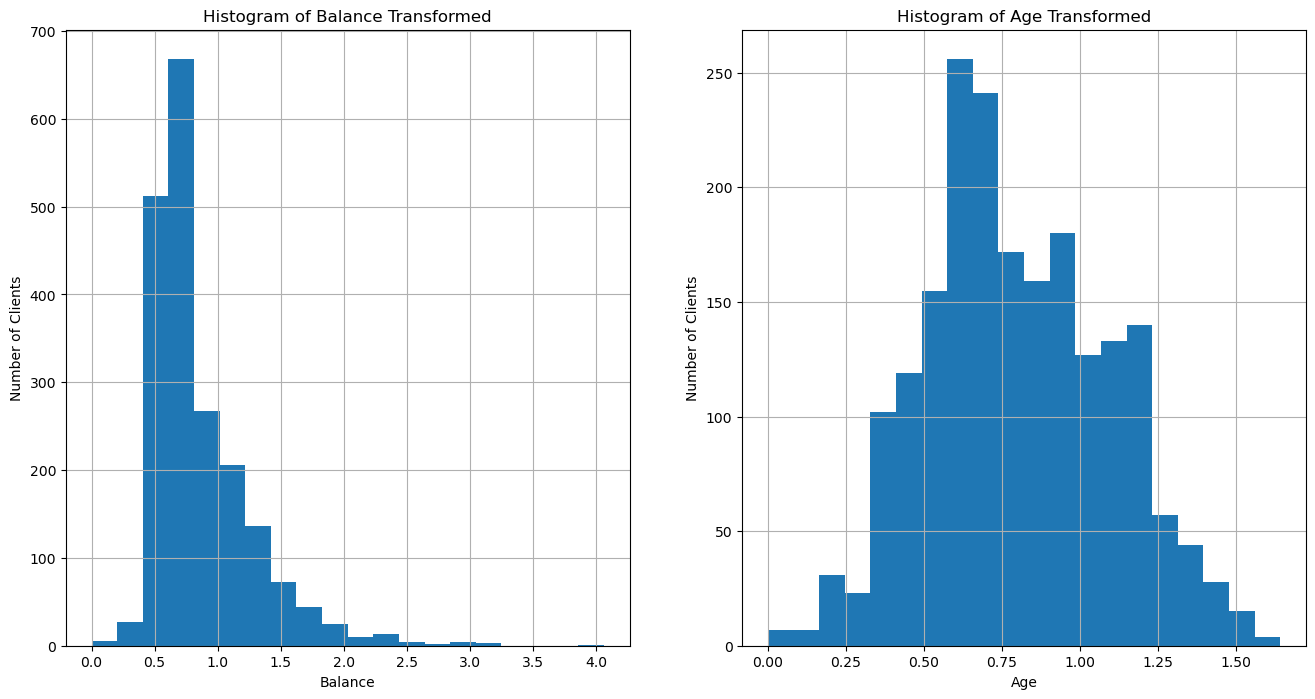

In [35]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,8))

# Plot balance
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of Balance Transformed")
ax1.set_xlabel('Balance')
ax1.set_ylabel('Number of Clients')
df['balance'].hist(bins=20)

# Plot age
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of Age Transformed")
ax3.set_xlabel('Age')
ax3.set_ylabel('Number of Clients')
df['age'].hist(bins=20)

plt.show()

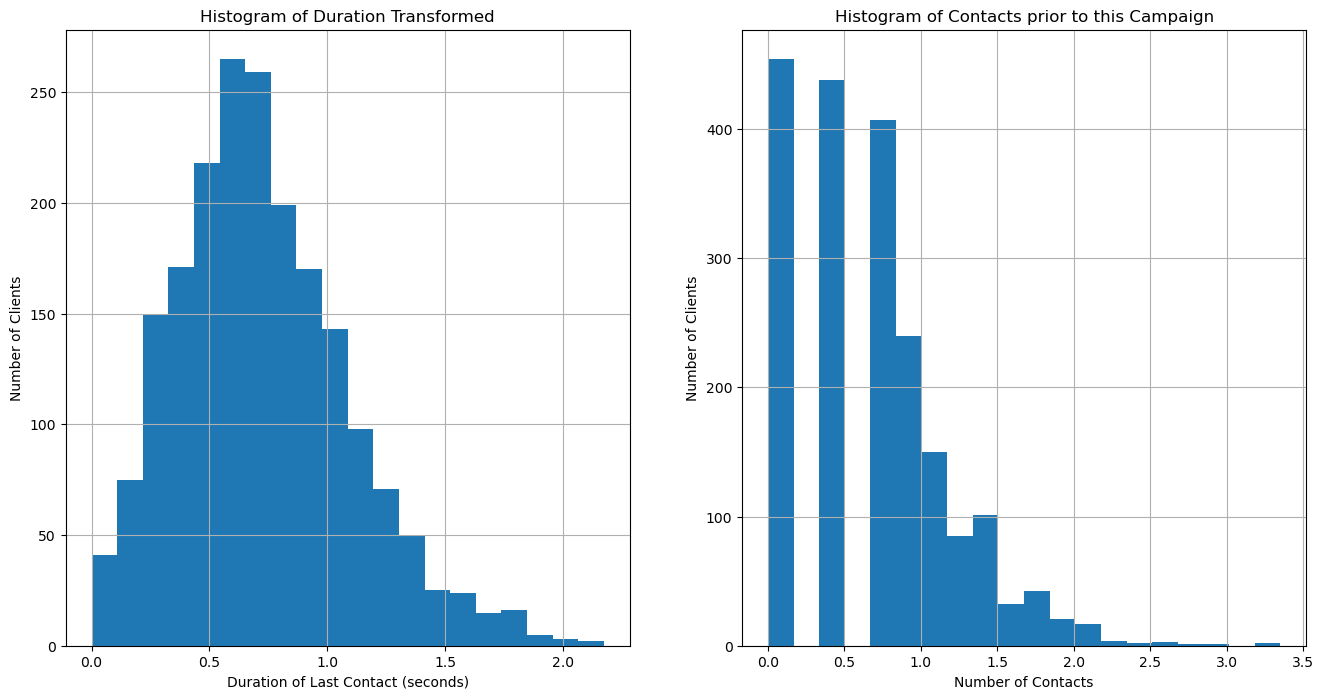

In [36]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,8))

# Plot duration
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of Duration Transformed")
ax1.set_xlabel('Duration of Last Contact (seconds)')
ax1.set_ylabel('Number of Clients')
df['duration'].hist(bins=20)

# Plot pdays
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of Contacts prior to this Campaign")
ax3.set_xlabel('Number of Contacts')
ax3.set_ylabel('Number of Clients')
df['previous'].hist(bins=20)

plt.show()

The histograms appear to be less skewed, with `balance`, `age`, and `duration` approximately normally distributed. We will investigate `previous` further. 

## F. Creation of Derived Features

### F.1 1 pdays

The column `pdays` contains the number of days since last contacted. There are many values with `-1`, signifying the client was not previously contacted. These skew the features towards zero which is not easily resolved by the log transformation. 

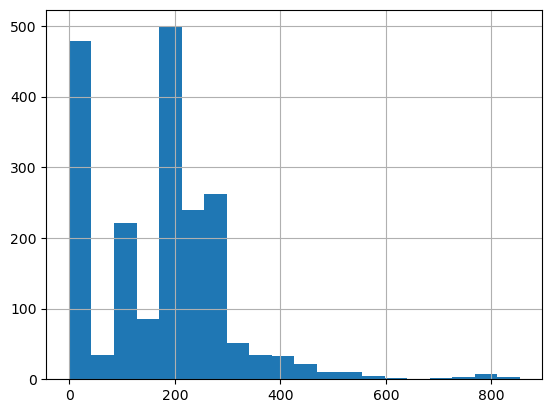

In [37]:
df['pdays'].hist(bins=20)
plt.show()

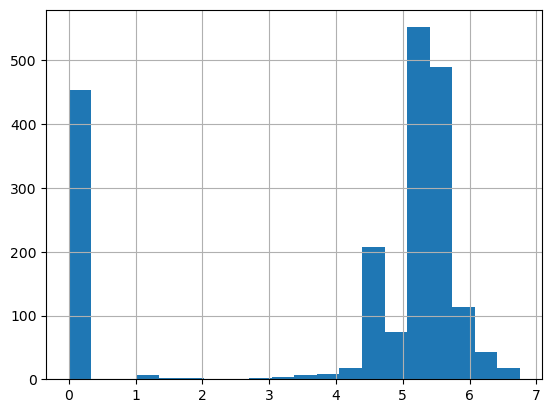

In [38]:
np.log(df['pdays']+2).hist(bins=20)
plt.show()

We can see the log transformation just made the problem worse, we will investigate the similar feature `previous` to explore a solution. 

In [39]:
(df_original['pdays'] == -1).sum()

454

There are 454 instances where the client was not previously contacted. This information is also availible in the `previous` variable, where no previous contacts were made.

In [40]:
(df_original['previous'] == 0).sum()

454

Let's confirm that these are the same rows, by checking the values of pdays when no previous campaigns were made. 

In [41]:
frequency_table = df_original[df_original['previous'] == 0]['pdays'].value_counts(dropna=False)
frequency_table

-1    454
Name: pdays, dtype: int64

We can proceed by:
* defining a binary variable `previous_contact_no`, which is 1 if the value of `previous` is 0. 
* defining a new variable `contact_by_pdays`, which is the feature `pdays` multiplied by `previous`. This should aleviate the skewness.
* dropping the variable `pdays` as it can be calculated using other features.

In [42]:
df['previous_contact_no'] = np.where(df['pdays'] == -1, 1, 0)

In [43]:
df['contact_by_pdays'] = df_original['previous']*df['pdays']
df[['contact_by_pdays']] = robust_scaler.fit_transform(df[['contact_by_pdays']])
df[['contact_by_pdays']].min()

contact_by_pdays   -0.625328
dtype: float64

In [44]:
df['contact_by_pdays'] = np.log(df['contact_by_pdays']+1.7)

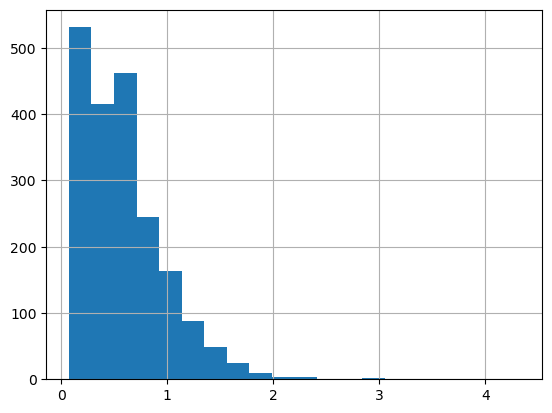

In [45]:
df['contact_by_pdays'].hist(bins=20)
plt.show()

The distribution of `contact_by_pdays` is still right skewed with many values at 0, however it is an improvement from `pdays`.

In [46]:
df.drop('pdays', axis=1, inplace=True)

### F.2 TotalContact


We have information on the number of contacts during this campaign, `campaign`, and the number of contacts prior to this campaign, `previous`. These are both right skewed distributions, we will combine these to form `total_contacts` and drop `previous` as it contains many outliers and is most skewed towards 0. 

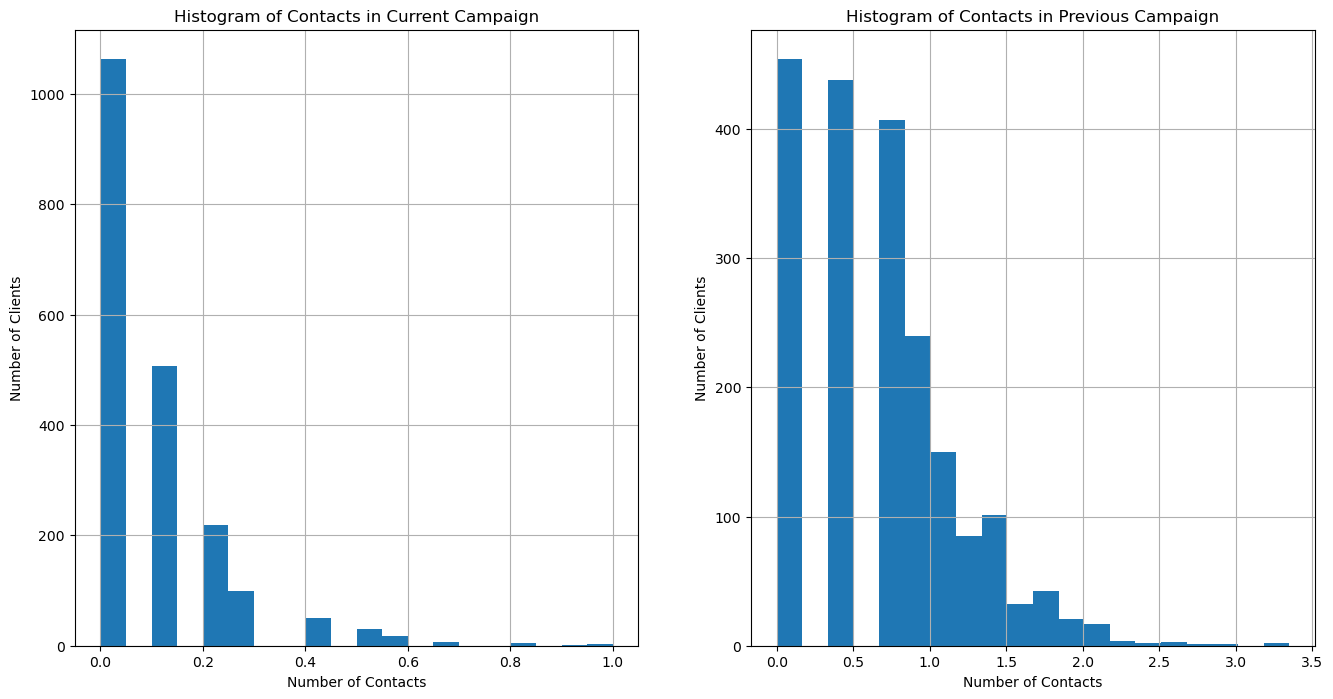

In [47]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,8))

# Plot campaign
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of Contacts in Current Campaign")
ax1.set_xlabel('Number of Contacts')
ax1.set_ylabel('Number of Clients')
df['campaign'].hist(bins=20)

# Plot previous
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of Contacts in Previous Campaign")
ax3.set_xlabel('Number of Contacts')
ax3.set_ylabel('Number of Clients')
df['previous'].hist(bins=20)

plt.show()

We see both distributions of `campaign` and `previous` are skewed. We combine them to form `total_contacts` using by adding them. 

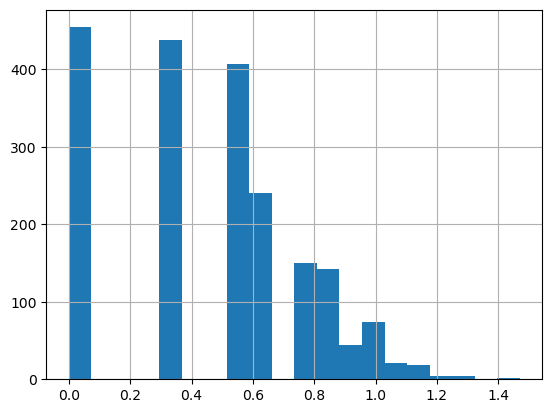

In [48]:
np.log(df['previous']+1).hist(bins=20)
plt.show()

We see the log transformed distribution of `previous` is still right skewed, and not normally distributed, with many values at 0. We aleviate this by creating `total_contact`, scaling it with the robust scaler, fitting a log transform, and dropping `previous`. 

In [49]:
df['total_contact'] = df_original['previous'] + df_original['campaign']
df[['total_contact']] = robust_scaler.fit_transform(df[['total_contact']])
df[['total_contact']].min()

total_contact   -0.666667
dtype: float64

In [50]:
df['total_contact'] = np.log(df['total_contact']+1.7)

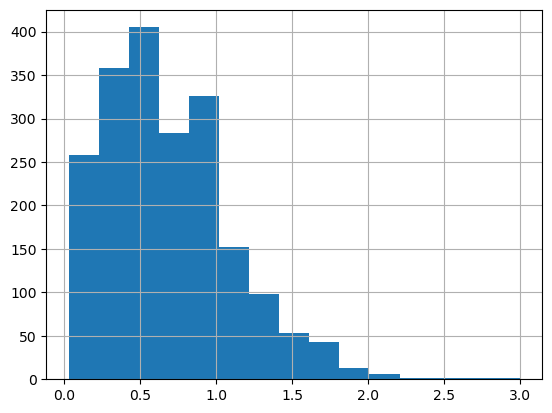

In [51]:
df['total_contact'].hist(bins=15)
plt.show()

There is some resolution of the skewness when we visualise `total_contact` compared to the individual `previous` contact numbers. This distribution is more approximately normal. We now drop `previous` from the analysis. 

In [52]:
df.drop('previous', axis=1, inplace=True)

# G. Save the Prepared Dataset

A final review of the dataset. 

In [53]:
df.isna().sum()

age                    0
education              0
balance                0
day                    0
month                  0
duration               0
campaign               0
poutcome_other         0
poutcome_success       0
poutcome_nan           0
contact_telephone      0
contact_nan            0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_nan                0
marital_married        0
marital_single         0
default_yes            0
housing_yes            0
loan_yes               0
subscribed_yes         0
previous_contact_no    0
contact_by_pdays       0
total_contact          0
dtype: int64

In [54]:
df.describe()

,age,education,balance,day,month,duration,campaign,poutcome_other,poutcome_success,poutcome_nan,...,job_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,previous_contact_no,contact_by_pdays,total_contact
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.797573,0.616750,0.864354,0.428383,0.363864,0.726829,0.090950,0.073500,0.222000,0.227000,...,0.005000,0.555500,0.337000,0.007500,0.481500,0.125000,0.500000,0.227000,0.566892,0.672510
std,0.293027,0.314713,0.403068,0.323740,0.279998,0.365006,0.137886,0.261021,0.415695,0.418997,...,0.070551,0.497034,0.472803,0.086299,0.499783,0.330802,0.500125,0.418997,0.432449,0.445184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072016,0.032790
25%,0.575364,0.500000,0.598166,0.133333,0.090909,0.467855,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.211371,0.312375
50%,0.747214,0.500000,0.723184,0.366667,0.363636,0.684526,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.530628,0.530628
75%,1.021651,1.000000,1.036304,0.733333,0.545455,0.954190,0.100000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.804407,0.861482
max,1.642228,1.000000,4.059642,1.000000,1.000000,2.174069,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.325785,2.997398


In [55]:
list(df.columns.values)

['age',
 'education',
 'balance',
 'day',
 'month',
 'duration',
 'campaign',
 'poutcome_other',
 'poutcome_success',
 'poutcome_nan',
 'contact_telephone',
 'contact_nan',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_nan',
 'marital_married',
 'marital_single',
 'default_yes',
 'housing_yes',
 'loan_yes',
 'subscribed_yes',
 'previous_contact_no',
 'contact_by_pdays',
 'total_contact']

In [57]:
df.to_csv('bank_prepared.csv', index = None)

In [58]:
df

,age,education,balance,day,month,duration,campaign,poutcome_other,poutcome_success,poutcome_nan,...,job_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,previous_contact_no,contact_by_pdays,total_contact
0,0.575364,1.0,0.668238,0.000000,0.272727,1.624770,0.1,0,0,0,...,0,0,1,0,1,0,0,0,0.426779,0.709676
1,0.773190,0.5,0.768220,0.000000,0.272727,0.678012,0.1,0,0,0,...,0,0,0,0,1,1,0,0,0.267724,0.530628
2,1.187166,0.5,0.873966,0.000000,0.272727,0.412593,0.1,0,0,0,...,0,1,0,0,1,1,0,0,0.400211,0.530628
3,0.959776,0.5,0.670367,0.000000,0.272727,0.763570,0.0,0,0,0,...,0,1,0,0,1,1,0,0,0.645066,0.530628
4,1.098612,0.5,0.864961,0.000000,0.272727,1.107159,0.0,0,0,0,...,0,1,0,0,1,0,0,0,0.476804,0.312375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.105361,0.5,1.283472,0.500000,0.727273,0.864320,0.1,0,0,1,...,0,0,1,0,0,0,1,1,0.072016,0.312375
1996,0.441833,0.5,0.569369,0.500000,0.727273,1.901403,0.1,0,0,1,...,0,0,1,0,0,0,1,1,0.072016,0.312375
1997,1.504077,0.0,0.907800,0.533333,0.727273,0.673645,0.0,0,0,1,...,0,1,0,0,0,0,1,1,0.072016,0.032790
1998,0.938270,0.0,1.545186,0.633333,0.727273,0.567555,0.0,0,0,1,...,0,1,0,0,1,0,1,1,0.072016,0.032790
